# Explore here

In [1]:
# Your code here
import pandas as pd


In [2]:
df = pd.read_csv('../data/raw/Lake_Bilancino.csv')

df

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31
...,...,...,...,...,...,...,...,...,...
6598,26/06/2020,0.0,0.0,0.0,0.0,0.0,22.50,250.85,0.60
6599,27/06/2020,0.0,0.0,0.0,0.0,0.0,23.40,250.84,0.60
6600,28/06/2020,0.0,0.0,0.0,0.0,0.0,21.50,250.83,0.60
6601,29/06/2020,0.0,0.0,0.0,0.0,0.0,23.20,250.82,0.60


In [3]:
df_2 = df[['Date','Lake_Level']]

df_2

,Date,Lake_Level
0,03/06/2002,249.43
1,04/06/2002,249.43
2,05/06/2002,249.43
3,06/06/2002,249.43
4,07/06/2002,249.44
...,...,...
6598,26/06/2020,250.85
6599,27/06/2020,250.84
6600,28/06/2020,250.83
6601,29/06/2020,250.82


In [4]:
df_2.index = df_2['Date']

df_2

,Date,Lake_Level
Date,,
03/06/2002,03/06/2002,249.43
04/06/2002,04/06/2002,249.43
05/06/2002,05/06/2002,249.43
06/06/2002,06/06/2002,249.43
07/06/2002,07/06/2002,249.44
...,...,...
26/06/2020,26/06/2020,250.85
27/06/2020,27/06/2020,250.84
28/06/2020,28/06/2020,250.83


In [5]:
df_2.drop('Date', axis=1, inplace=True)

df_2

/tmp/ipykernel_11791/1964984335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop('Date', axis=1, inplace=True)


,Lake_Level
Date,
03/06/2002,249.43
04/06/2002,249.43
05/06/2002,249.43
06/06/2002,249.43
07/06/2002,249.44
...,...
26/06/2020,250.85
27/06/2020,250.84
28/06/2020,250.83


/home/vscode/.local/lib/python3.10/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.23.0)
  from scipy.stats import gaussian_kde


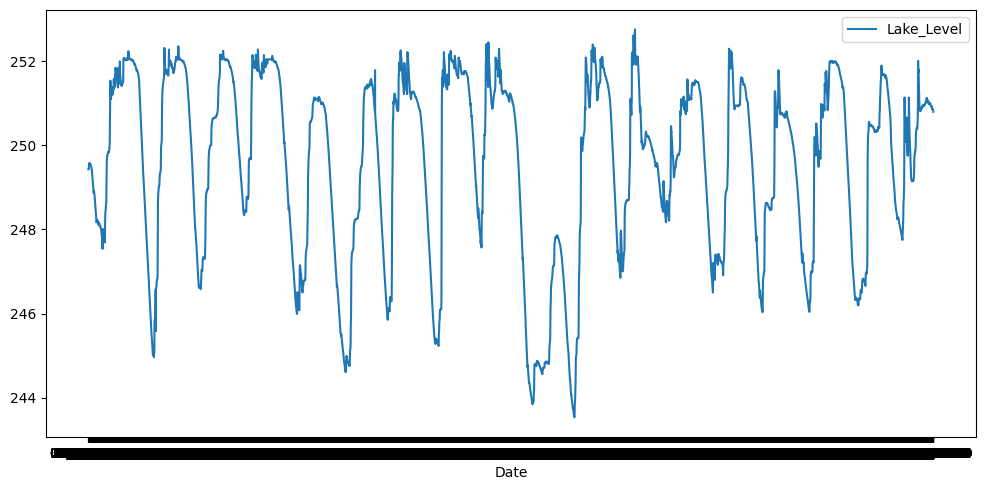

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize= (10,5))

sns.lineplot(data = df_2)

plt.tight_layout()
plt.show()

In [7]:
# Descomposición de la serie

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_2,period= 365)

decomposition

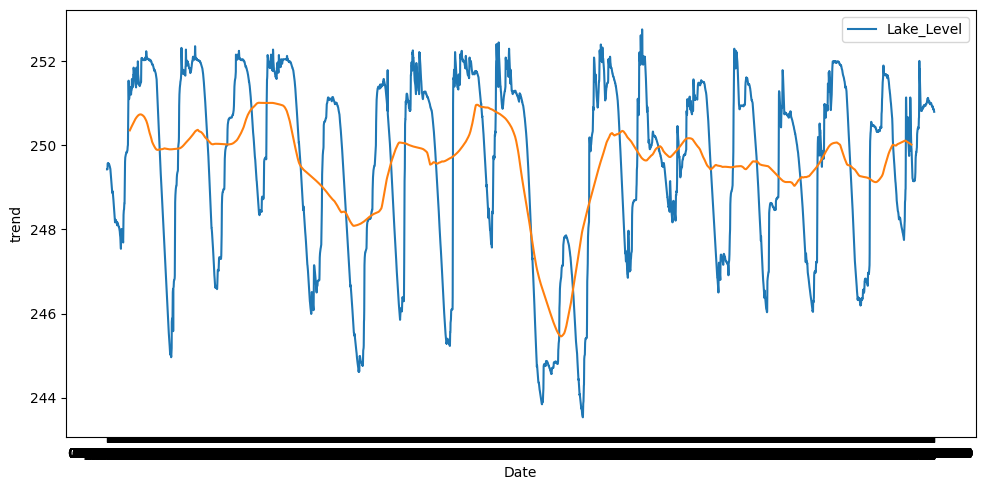

In [8]:
#identificar la tendencia

trend = decomposition.trend

fig, axis = plt.subplots(figsize=(10,5))

sns.lineplot(data= df_2)
sns.lineplot(data= trend)

plt.tight_layout()
plt.show()
             

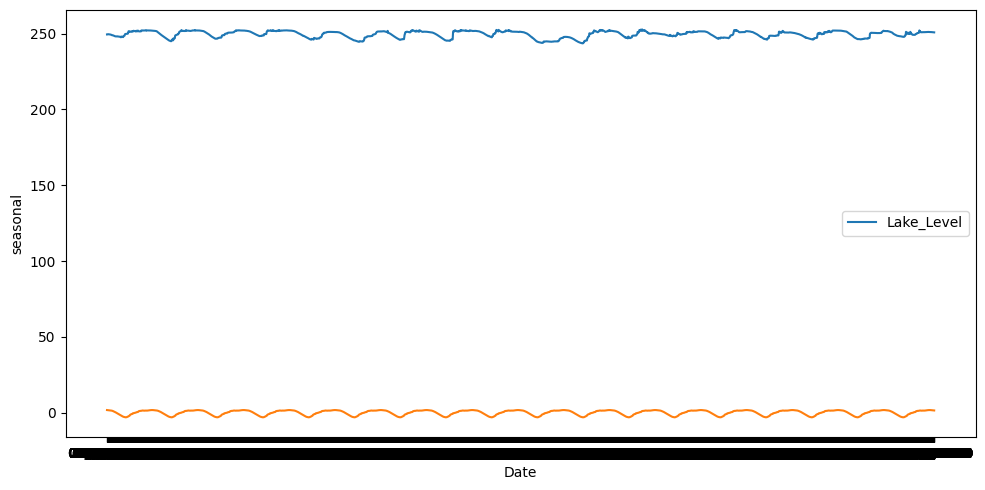

In [9]:
#Estacionalidad

seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10,5))

sns.lineplot(data=df_2)
sns.lineplot(data=seasonal)

plt.tight_layout()
plt.show()

Hay una alta estacionalidad, ya que son parecidos la estacioanalidad con el nivel del lago

In [10]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print('Resultados de la prueba de Dickey-Fuller')
    
    # Ejecutar la prueba ADF
    dftest = adfuller(timeseries, autolag='AIC')
    
    # Crear una Serie de pandas con los primeros 4 resultados
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    # Agregar valores críticos
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    
    return dfoutput

# Llamar a la función con la serie de tiempo (ejemplo con df_2)
resultado = test_stationarity(df_2)
print(resultado)


Resultados de la prueba de Dickey-Fuller
Test Statistic                -6.880991e+00
p-value                        1.433634e-09
#Lags Used                     3.500000e+01
Number of Observations Used    6.567000e+03
Critical Value (1%)           -3.431346e+00
Critical Value (5%)           -2.861980e+00
Critical Value (10%)          -2.567004e+00
dtype: float64


In [11]:

from statsmodels.tsa.stattools import adfuller

def test_stationarity (timeseries):
    print('Resultados de la prueba de Dickey-Fuller')
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value','#Lags Used','Number of Observation Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

test_stationarity(df_2)

Resultados de la prueba de Dickey-Fuller


Test Statistic               -6.880991e+00
p-value                       1.433634e-09
#Lags Used                    3.500000e+01
Number of Observation Used    6.567000e+03
Critical Value (1%)          -3.431346e+00
Critical Value (5%)          -2.861980e+00
Critical Value (10%)         -2.567004e+00
dtype: float64

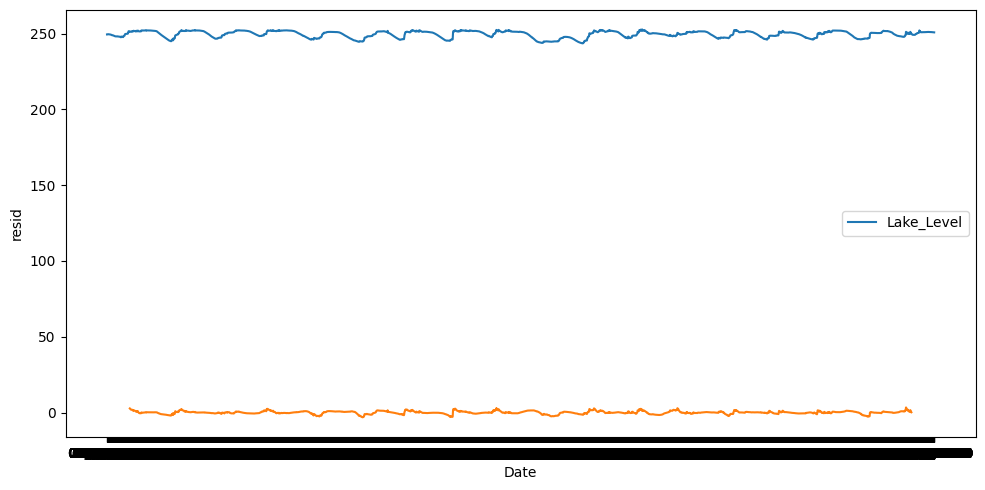

In [12]:
#Estudiar los residuos

residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10,5))

sns.lineplot(data=df_2)
sns.lineplot(data=residual)

plt.tight_layout()
plt.show()

Los residuos no son relevantes para hacer una prediccion (son muy pequeños)

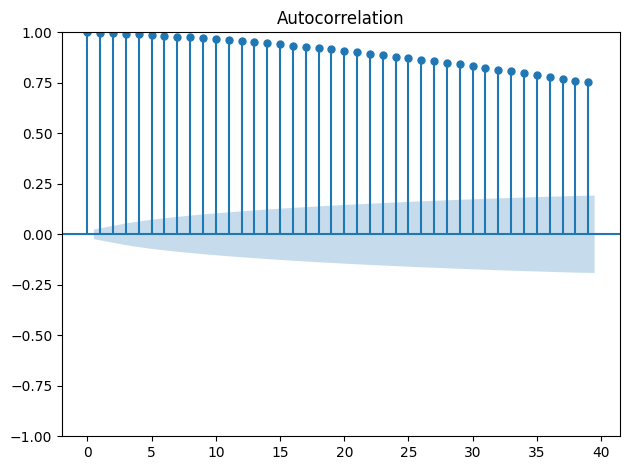

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_2)

plt.tight_layout()
plt.show()

valores muy altos de correlación y la variabilidad mientras pasa el tiempo crece. Candidato perfecto para hacer un modelo ARIMA

In [14]:
#arima 

from pmdarima import auto_arima

model = auto_arima(df_2, seasonal= True, trace = True)


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-12552.739, Time=3.43 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11118.435, Time=0.32 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-12469.605, Time=0.59 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-12130.639, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11120.409, Time=0.19 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-12561.114, Time=3.63 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-12395.703, Time=1.54 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-12554.341, Time=3.36 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-12598.111, Time=5.91 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-12479.939, Time=2.03 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-12601.974, Time=7.21 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=9.51 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-12604.630, Time=8.13 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-12616.670, Time=8.63 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-12506.092, Time=2.27 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=-12609.426, Time=3.79 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-12524.228, Time=2.93 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,5)(0,0,0)[0] intercept   : AIC=-12609.643, Time=10.80 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,0,0)[0]             : AIC=-12618.669, Time=3.23 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(0,0,0)[0]             : AIC=-12508.082, Time=1.20 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-12600.109, Time=2.30 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[0]             : AIC=-12615.213, Time=4.40 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,5)(0,0,0)[0]             : AIC=-12618.691, Time=3.76 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,5)(0,0,0)[0]             : AIC=-12526.220, Time=1.31 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,5)(0,0,0)[0]             : AIC=-12614.796, Time=5.13 sec

Best model:  ARIMA(1,1,5)(0,0,0)[0]          
Total fit time: 96.763 seconds


In [15]:
forecast = model.predict(30)
forecast

/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


6603    250.790266
6604    250.783301
6605    250.777943
6606    250.773466
6607    250.769367
6608    250.765390
6609    250.761531
6610    250.757788
6611    250.754155
6612    250.750631
6613    250.747212
6614    250.743895
6615    250.740676
6616    250.737553
6617    250.734523
6618    250.731583
6619    250.728731
6620    250.725963
6621    250.723278
6622    250.720673
6623    250.718145
6624    250.715693
6625    250.713313
6626    250.711005
6627    250.708765
6628    250.706592
6629    250.704483
6630    250.702437
6631    250.700452
6632    250.698527
dtype: float64

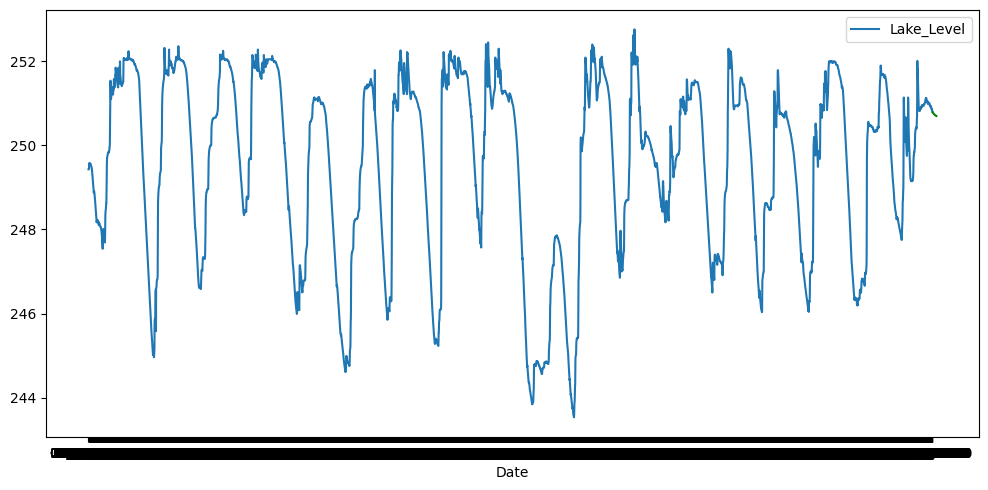

In [19]:
fig, axis = plt.subplots(figsize=(10,5))

sns.lineplot(data=df_2[df_2.index>'01-05-2020'])
sns.lineplot(data=forecast, c ='green')

plt.tight_layout()
plt.show()


ARIMA no es efectivo para largos periodos de tiempo. A mayor puntos de tiempos, menos precisión. 


In [21]:
from pickle import dump

dump(model,open('../models/arima_1_1_5','wb'))